# Peak detection with Mint.

You can use Mint to detect peaks automatically. First, you have to instantiate `mint = Mint()` and then assign some ms files with `mint.files = [list of filenames]`. Then you can run `.detect_peaks()`. All, currently loaded files with be used to create a rudimentary peaklist. When the run is successfull the generated peaklist is available via the `.peaklist` property. This feature is very basic and is under active development.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from TB.c import *

import pandas as pd
import numpy as np
import os, re

from os.path import isdir, isfile, basename, dirname

from glob import glob
from pathlib import Path as P
from tqdm.notebook import tqdm

import seaborn as sns



#### Example

In [3]:
from ms_mint.notebook import Mint

In [4]:
PATH = '../MINT_demofiles/'
files = glob(f'{PATH}/**/*.mzXML', recursive=True)

In [5]:
len(files)

12

#### Instantiate mint and assign files

In [6]:
mint = Mint()
mint.show()

HTML(value='<style>textarea, input { font-family: monospace; }</style>')

HTML(value='<style>.container { width:90% !important; }</style>')

HTML(value='<style>textarea, input { font-family: monospace; }</style>')

HTML(value='<style>.container { width:90% !important; }</style>')

In [7]:
mint.ms_files = files
mint.list_files()

#### Run the peak detection

In [8]:
%%time
mint.detect_peaks(min_quality=1e-2)

 21%|██        | 29/141 [00:00<00:00, 288.94it/s]

Condensing peaklist


100%|██████████| 141/141 [00:00<00:00, 205.30it/s]

CPU times: user 3min 38s, sys: 10.5 s, total: 3min 49s
Wall time: 1min 9s


#### A peak list will be generated

In [9]:
mint.peaklist

,peak_label,mz_mean,mz_width,rt_min,rt_max,intensity_threshold,peaklist,rt,rt_span
0,0-92.928-6.576,92.928088,10,6.576056,7.088692,0,experimental,6.857193,0.512637
1,1-94.925-6.572,94.925093,10,6.571638,7.060771,0,experimental,6.832298,0.489133
2,2-100.934-0.041,100.933666,10,0.041438,1.941659,0,experimental,0.991158,1.900221
3,3-100.934-14.285,100.933703,10,14.284894,15.608903,0,experimental,14.971726,1.324008
4,4-100.934-1.542,100.933708,10,1.542005,2.450861,0,experimental,1.985842,0.908856
5,5-100.934-2.603,100.933715,10,2.602842,3.993612,0,experimental,3.309842,1.390770
6,6-102.957-5.866,102.956664,10,5.866167,7.609824,0,experimental,6.733475,1.743658
7,7-112.985-6.159,112.985442,10,6.159298,6.820335,0,experimental,6.489817,0.661037
8,8-112.986-5.975,112.985746,10,5.974828,7.032272,0,experimental,6.503109,1.057443
9,9-115.921-14.329,115.920797,10,14.329006,15.663194,0,experimental,14.994038,1.334187


#### Finally, you can run MINT to extract the data

In [10]:
%%time
mint.run()

CPU times: user 128 ms, sys: 152 ms, total: 280 ms
Wall time: 36.3 s


# Results

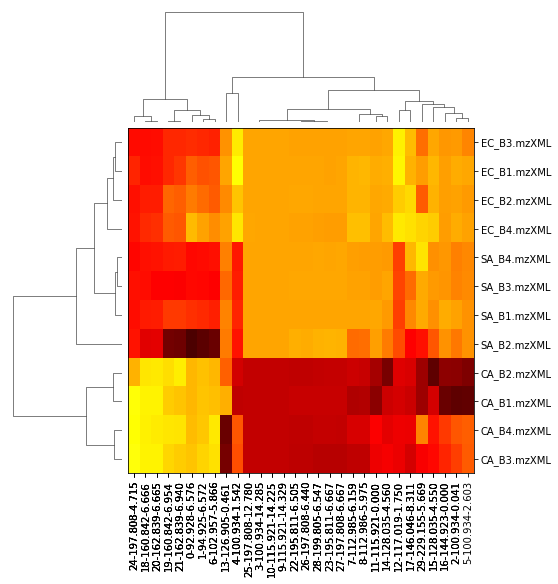

In [13]:
mint.plot_clustering(xmaxticks=100)